# Data Clean
### Takes data labels it, and breaks it into one second chunks
#### David Saffo
#### 5/16/2017

In [1]:
import pandas as pd
import itertools
import numpy as np
from io import StringIO
import math
import scipy.stats.stats as stats
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [2]:
noelWalking = pd.read_csv("noel walking.csv", header = None)
noelRunning = pd.read_csv("noel running.csv", header = None)
noelSleeping = pd.read_csv("noel sleeping.csv", header = None)
noelClimbing = pd.read_csv("noel climbing.csv", header = None)

In [3]:
def createDF(sub, act, data):
    x = 0
    i = 0
    array = []
    d = []
    for index, row in data.iterrows():
        if (data.iloc[index,0].is_integer()==False):
            array.append([data.iloc[index,1],data.iloc[index,2],data.iloc[index,3]])
        elif (data.iloc[index,0].is_integer()==True):
            d.append([sub , act, array])
            array = []
            i+=1

    d.pop(0)
    d.pop(1)
    d.pop(-1)
    d.pop(-2)

    dftest = pd.DataFrame(d)
    
    return dftest

In [4]:
df = createDF("noel", "walking", noelWalking)
df = df.append(createDF("noel", "running", noelRunning), ignore_index=True)
df = df.append(createDF("noel", "sleeping", noelSleeping), ignore_index=True)
df = df.append(createDF("noel", "climbing", noelClimbing), ignore_index=True)

In [5]:
temp = []
a = []
mag = []
for i in range(len(df)):
    temp = df.iloc[i,2]
    mag = []
    for j in range(len(temp)):
        x = temp[j][0]
        y = temp[j][1]
        z = temp[j][2]
    
        magnitude = math.sqrt(x ** 2 + y ** 2 + z ** 2)
        
        mag.append(magnitude)
       
    a.append(mag)

df.insert(3, "magnitude", a)
    
    

In [6]:
df.head()

,0,1,2,magnitude
0,noel,walking,"[[0.002076, -0.006743, -0.002139], [0.002061, ...","[0.007372458612973016, 0.003802972916022411, 0..."
1,noel,walking,"[[0.023377, -0.013351, -0.425448], [-0.098312,...","[0.4262988787623068, 0.4827258387418266, 0.350..."
2,noel,walking,"[[0.065003, 0.046967, -0.1216], [0.067933, 0.0...","[0.1456634789437627, 0.15239350389370276, 0.16..."
3,noel,walking,"[[-0.031417, 0.082261, -0.079272], [-0.025344,...","[0.11848185512558453, 0.12827635544011998, 0.1..."
4,noel,walking,"[[0.070741, 0.150697, -0.32175], [0.135728, 0....","[0.36226639009160094, 0.4096696632361249, 0.43..."


In [7]:
temp = []
a = []


for i in range(len(df)):
    temp = df.iloc[i,3]
    Max = max(temp)
       
    a.append(Max)

df.insert(4, "max", a)

In [8]:
df.head()

,0,1,2,magnitude,max
0,noel,walking,"[[0.002076, -0.006743, -0.002139], [0.002061, ...","[0.007372458612973016, 0.003802972916022411, 0...",0.772422
1,noel,walking,"[[0.023377, -0.013351, -0.425448], [-0.098312,...","[0.4262988787623068, 0.4827258387418266, 0.350...",0.570496
2,noel,walking,"[[0.065003, 0.046967, -0.1216], [0.067933, 0.0...","[0.1456634789437627, 0.15239350389370276, 0.16...",0.573341
3,noel,walking,"[[-0.031417, 0.082261, -0.079272], [-0.025344,...","[0.11848185512558453, 0.12827635544011998, 0.1...",0.564052
4,noel,walking,"[[0.070741, 0.150697, -0.32175], [0.135728, 0....","[0.36226639009160094, 0.4096696632361249, 0.43...",0.586625


In [9]:
temp = []
a = []


for i in range(len(df)):
    temp = df.iloc[i,3]
    Min = min(temp)
       
    a.append(Min)

df.insert(5, "min", a)

In [10]:
df.head()

,0,1,2,magnitude,max,min
0,noel,walking,"[[0.002076, -0.006743, -0.002139], [0.002061, ...","[0.007372458612973016, 0.003802972916022411, 0...",0.772422,0.003803
1,noel,walking,"[[0.023377, -0.013351, -0.425448], [-0.098312,...","[0.4262988787623068, 0.4827258387418266, 0.350...",0.570496,0.157260
2,noel,walking,"[[0.065003, 0.046967, -0.1216], [0.067933, 0.0...","[0.1456634789437627, 0.15239350389370276, 0.16...",0.573341,0.084021
3,noel,walking,"[[-0.031417, 0.082261, -0.079272], [-0.025344,...","[0.11848185512558453, 0.12827635544011998, 0.1...",0.564052,0.118482
4,noel,walking,"[[0.070741, 0.150697, -0.32175], [0.135728, 0....","[0.36226639009160094, 0.4096696632361249, 0.43...",0.586625,0.176065


In [11]:
temp = []
a = []


for i in range(len(df)):
    temp = df.iloc[i,3]
    x = np.array(temp)
    std = np.std(x)
    a.append(std)

df.insert(6, "std", a)

In [12]:
df.head()

,0,1,2,magnitude,max,min,std
0,noel,walking,"[[0.002076, -0.006743, -0.002139], [0.002061, ...","[0.007372458612973016, 0.003802972916022411, 0...",0.772422,0.003803,0.192916
1,noel,walking,"[[0.023377, -0.013351, -0.425448], [-0.098312,...","[0.4262988787623068, 0.4827258387418266, 0.350...",0.570496,0.157260,0.088100
2,noel,walking,"[[0.065003, 0.046967, -0.1216], [0.067933, 0.0...","[0.1456634789437627, 0.15239350389370276, 0.16...",0.573341,0.084021,0.091172
3,noel,walking,"[[-0.031417, 0.082261, -0.079272], [-0.025344,...","[0.11848185512558453, 0.12827635544011998, 0.1...",0.564052,0.118482,0.074929
4,noel,walking,"[[0.070741, 0.150697, -0.32175], [0.135728, 0....","[0.36226639009160094, 0.4096696632361249, 0.43...",0.586625,0.176065,0.076042


In [13]:
temp = []
a = []


for i in range(len(df)):
    temp = df.iloc[i,3]
    skew = stats.skew(temp)
    a.append(skew)

df.insert(7, "skew", a)

In [14]:
df.head()

,0,1,2,magnitude,max,min,std,skew
0,noel,walking,"[[0.002076, -0.006743, -0.002139], [0.002061, ...","[0.007372458612973016, 0.003802972916022411, 0...",0.772422,0.003803,0.192916,1.018784
1,noel,walking,"[[0.023377, -0.013351, -0.425448], [-0.098312,...","[0.4262988787623068, 0.4827258387418266, 0.350...",0.570496,0.157260,0.088100,1.280912
2,noel,walking,"[[0.065003, 0.046967, -0.1216], [0.067933, 0.0...","[0.1456634789437627, 0.15239350389370276, 0.16...",0.573341,0.084021,0.091172,0.374890
3,noel,walking,"[[-0.031417, 0.082261, -0.079272], [-0.025344,...","[0.11848185512558453, 0.12827635544011998, 0.1...",0.564052,0.118482,0.074929,1.186111
4,noel,walking,"[[0.070741, 0.150697, -0.32175], [0.135728, 0....","[0.36226639009160094, 0.4096696632361249, 0.43...",0.586625,0.176065,0.076042,1.275566


In [15]:
temp = []
a = []

for i in range(len(df)):
    temp = df.iloc[i,3]
    kurt = stats.kurtosis(temp)
    a.append(kurt)
df.insert(8, "kurtosis", a)

In [16]:
df.head()

,0,1,2,magnitude,max,min,std,skew,kurtosis
0,noel,walking,"[[0.002076, -0.006743, -0.002139], [0.002061, ...","[0.007372458612973016, 0.003802972916022411, 0...",0.772422,0.003803,0.192916,1.018784,0.236291
1,noel,walking,"[[0.023377, -0.013351, -0.425448], [-0.098312,...","[0.4262988787623068, 0.4827258387418266, 0.350...",0.570496,0.157260,0.088100,1.280912,1.676030
2,noel,walking,"[[0.065003, 0.046967, -0.1216], [0.067933, 0.0...","[0.1456634789437627, 0.15239350389370276, 0.16...",0.573341,0.084021,0.091172,0.374890,0.808654
3,noel,walking,"[[-0.031417, 0.082261, -0.079272], [-0.025344,...","[0.11848185512558453, 0.12827635544011998, 0.1...",0.564052,0.118482,0.074929,1.186111,2.447354
4,noel,walking,"[[0.070741, 0.150697, -0.32175], [0.135728, 0....","[0.36226639009160094, 0.4096696632361249, 0.43...",0.586625,0.176065,0.076042,1.275566,1.839276


In [17]:
temp = []
a = []


for i in range(len(df)):
    temp = df.iloc[i,3]
    x = np.array(temp)
    Mean = np.mean(x)
    a.append(Mean)

df.insert(9, "mean", a)

In [18]:
df.head()

,0,1,2,magnitude,max,min,std,skew,kurtosis,mean
0,noel,walking,"[[0.002076, -0.006743, -0.002139], [0.002061, ...","[0.007372458612973016, 0.003802972916022411, 0...",0.772422,0.003803,0.192916,1.018784,0.236291,0.172918
1,noel,walking,"[[0.023377, -0.013351, -0.425448], [-0.098312,...","[0.4262988787623068, 0.4827258387418266, 0.350...",0.570496,0.157260,0.088100,1.280912,1.676030,0.273770
2,noel,walking,"[[0.065003, 0.046967, -0.1216], [0.067933, 0.0...","[0.1456634789437627, 0.15239350389370276, 0.16...",0.573341,0.084021,0.091172,0.374890,0.808654,0.285122
3,noel,walking,"[[-0.031417, 0.082261, -0.079272], [-0.025344,...","[0.11848185512558453, 0.12827635544011998, 0.1...",0.564052,0.118482,0.074929,1.186111,2.447354,0.277369
4,noel,walking,"[[0.070741, 0.150697, -0.32175], [0.135728, 0....","[0.36226639009160094, 0.4096696632361249, 0.43...",0.586625,0.176065,0.076042,1.275566,1.839276,0.301161


In [19]:
temp = []
a = []


for i in range(len(df)):
    temp = df.iloc[i,3]
    x = np.array(temp)
    Median = np.median(x)
    a.append(Median)

df.insert(10, "median", a)

In [20]:
df.head()

,0,1,2,magnitude,max,min,std,skew,kurtosis,mean,median
0,noel,walking,"[[0.002076, -0.006743, -0.002139], [0.002061, ...","[0.007372458612973016, 0.003802972916022411, 0...",0.772422,0.003803,0.192916,1.018784,0.236291,0.172918,0.060156
1,noel,walking,"[[0.023377, -0.013351, -0.425448], [-0.098312,...","[0.4262988787623068, 0.4827258387418266, 0.350...",0.570496,0.157260,0.088100,1.280912,1.676030,0.273770,0.263921
2,noel,walking,"[[0.065003, 0.046967, -0.1216], [0.067933, 0.0...","[0.1456634789437627, 0.15239350389370276, 0.16...",0.573341,0.084021,0.091172,0.374890,0.808654,0.285122,0.290330
3,noel,walking,"[[-0.031417, 0.082261, -0.079272], [-0.025344,...","[0.11848185512558453, 0.12827635544011998, 0.1...",0.564052,0.118482,0.074929,1.186111,2.447354,0.277369,0.263598
4,noel,walking,"[[0.070741, 0.150697, -0.32175], [0.135728, 0....","[0.36226639009160094, 0.4096696632361249, 0.43...",0.586625,0.176065,0.076042,1.275566,1.839276,0.301161,0.279459


In [26]:
Y = df[1]
features = ['max', 'min', 'std', 'skew', 'mean', 'median']
X = df[features]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

[0.87142857142857144, 1]


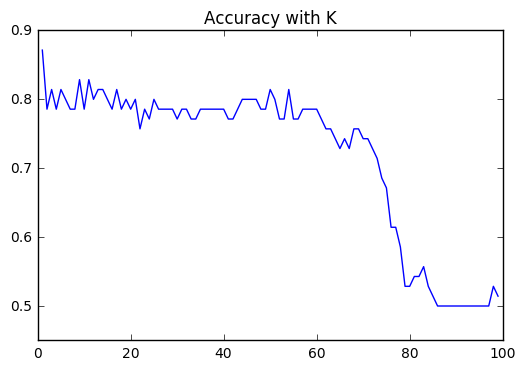

In [28]:
kResult= []
for n in range(1, 100,1):
    model = KNeighborsClassifier(n_neighbors = n)
    model.fit(X_train, y_train)

    expected = y_test
    predicted = model.predict(X_test)
    acc = accuracy_score(expected, predicted)


    kResult.append([acc,n])
print(max(kResult))
#plotting peak k value preformance 
kResult = pd.DataFrame(kResult, columns=["n", "acc"])
plt.plot(kResult.acc, kResult.n)
plt.title("Accuracy with K")
plt.show()

Classification Report:
             precision    recall  f1-score   support

   climbing       0.68      0.81      0.74        16
    running       1.00      1.00      1.00        20
   sleeping       0.93      0.70      0.80        20
    walking       0.88      1.00      0.93        14

avg / total       0.88      0.87      0.87        70

Confusion Matrix:
[[13  0  1  2]
 [ 0 20  0  0]
 [ 6  0 14  0]
 [ 0  0  0 14]]
Confusion matrix, without normalization
[[13  0  1  2]
 [ 0 20  0  0]
 [ 6  0 14  0]
 [ 0  0  0 14]]
Normalized confusion matrix
[[ 0.81  0.    0.06  0.12]
 [ 0.    1.    0.    0.  ]
 [ 0.3   0.    0.7   0.  ]
 [ 0.    0.    0.    1.  ]]


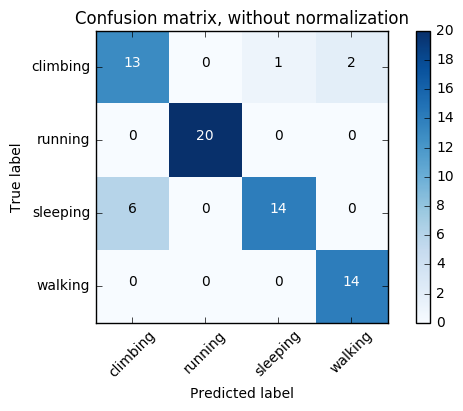

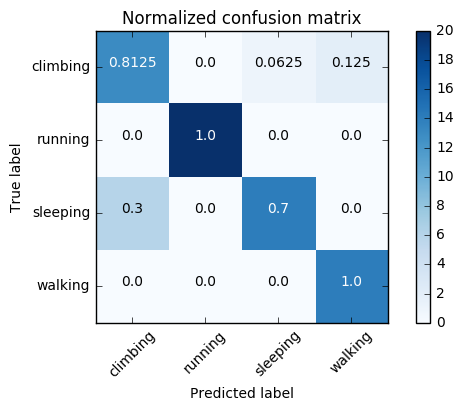

In [29]:
model = KNeighborsClassifier(n_neighbors = 1)
model.fit(X_train, y_train)

class_names = ["climbing", "running", "sleeping", "walking"]
expected = y_test
predicted = model.predict(X_test)
print("Classification Report:")
print(metrics.classification_report(expected, predicted))
print("Confusion Matrix:")
print(metrics.confusion_matrix(expected, predicted))

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(expected, predicted)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()